# SVM
This program uses Support Vector Machine to solve housing price problem.

## Imports
all of the necessary imports to solve the problem

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import mean_squared_error
import json as storage

## Class
The class has methods that uses the methods from the libraries and gives losses and accuracies. It also plots the graphs that shows the relations among variables and the results.

In [3]:
class ModelUsingSVM:
    def __init__(self):
        self.file = pd.read_csv("E:/progamming/Machine learning/internship/housing2.csv") 
        self.featureNames = ["price", "area", "bedrooms", "bathrooms", "stories", "parking", "basement"]
        self.scaledFeatures = []
        # self.X_train = self.X_test = self.y_train = self.y_test = 0
        self.model = 0
        #self.thetas = []
        
        self.trainX = self.trainY = []
        self.validX = []
        self.validY = []
        self.testX = []
        self.testY = []
    
    def readCSV(self):
        self.file['basement'] = self.file['basement'].map({'yes': 1, 'no': 0})
        print(self.file)
        
    def scaleData(self):
        scale = StandardScaler()
        X = self.file[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
        self.scaledFeatures = scale.fit_transform(X)
        
        basement_column = self.file['basement'].values.reshape(-1, 1)
        self.scaledFeatures = np.hstack((self.scaledFeatures, basement_column))
        print("Scaled features: ", self.scaledFeatures)
    
    def splittingData(self):
        Y = self.scaledFeatures[:, 0]
        X = self.scaledFeatures[:, 1:6]
        X_train_valid, self.testX, y_train_valid, self.testY = train_test_split(X, Y, test_size=0.15, random_state=42)
        self.trainX, self.validX, self.trainY, self.validY = train_test_split(X_train_valid, y_train_valid, test_size=0.176, random_state=42)
       
    
    def graphBwFeatures(self):
        df_scaled = pd.DataFrame(self.scaledFeatures, columns = self.featureNames)
        sns.lmplot(x ="area", y ="price", data = df_scaled, ci = None) 
        plt.show()
        sns.lmplot(x ="bedrooms", y ="price", data = df_scaled, ci = None) 
        plt.show()
        sns.lmplot(x ="bathrooms", y ="price", data = df_scaled, ci = None) 
        plt.show()
        sns.lmplot(x ="stories", y ="price", data = df_scaled, ci = None) 
        plt.show()
        sns.lmplot(x ="parking", y ="price", data = df_scaled, ci = None) 
        plt.show()
        sns.lmplot(x ="basement", y ="price", data = df_scaled, ci = None) 
        plt.show()
    
    def calcCost(self):
        preds = self.model.predict(self.trainX)
        mse = mean_squared_error(self.trainY, preds)
        mse = mse / 2
        return mse

    def training(self):
        self.model = svm.SVR(kernel = 'linear')
        self.model.fit(self.trainX, self.trainY)
        cost = self.calcCost()
        print(f"Cost from training: {cost}")
        
        # self.reg = LinearRegression().fit(self.X_train, self.y_train)
        # cost = self.calcCost()
        # print(f"Cost from training: {cost}")
    
    def validation(self):
        validLoss = self.Loss(self.validX, self.validY)
        validAccu = self.calcAccuracy(self.validX, self.validY)
        print(f"Validation Loss: {validLoss}, Validation Accuracy: {validAccu * 100}")
    
    def testing(self):
        testLoss = self.Loss(self.testX, self.testY)
        testAccu = self.calcAccuracy(self.testX, self.testY)
        print(f"Testing Loss: {testLoss}, Testing Accuracy: {testAccu * 100}")
    
    def Loss(self, X, Y):
        preds = self.model.predict(X)
        mse = mean_squared_error(Y, preds)
        mse = mse / 2
        return mse
    
    def calcAccuracy(self, X, Y):
        accuracy = self.model.score(X, Y)
        return accuracy 
    
    def storeJson(self):
        data = {'TrainingLoss' : self.calcCost(),
                'ValidationLoss': self.Loss(self.validX, self.validY), 
                'ValidationAccuracy' : self.calcAccuracy(self.validX, self.validY) * 100,
                'TestingLoss' : self.Loss(self.testX, self.testY),
                'TestingAccuracy' : self.calcAccuracy(self.testX, self.testY) * 100}
        
        with open("ModelWithSVMValues.json", "w") as file3:
            storage.dump(data, file3)

        print("Everything stored successfully!")

    def plotResults(self):
        train_preds = self.model.predict(self.trainX)
        valid_preds = self.model.predict(self.validX)
        test_preds = self.model.predict(self.testX)

        plt.figure(figsize=(14, 7))

        # Plot training data
        plt.subplot(1, 3, 1)
        plt.scatter(self.trainY, train_preds, alpha=0.5)
        plt.plot([self.trainY.min(), self.trainY.max()], [self.trainY.min(), self.trainY.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Training Data')

        # Plot validation data
        plt.subplot(1, 3, 2)
        plt.scatter(self.validY, valid_preds, alpha=0.5)
        plt.plot([self.validY.min(), self.validY.max()], [self.validY.min(), self.validY.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Validation Data')

        # Plot testing data
        plt.subplot(1, 3, 3)
        plt.scatter(self.testY, test_preds, alpha=0.5)
        plt.plot([self.testY.min(), self.testY.max()], [self.testY.min(), self.testY.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Testing Data')

        plt.tight_layout()
        plt.show()
    

the readCSV() methond reads and prints the csv file being used for the problem


In [18]:
vector = ModelUsingSVM()
vector.readCSV()

        price  area  bedrooms  bathrooms  stories  parking  basement
0    13300000  7420         4          2        3        2         0
1    12250000  8960         4          4        4        3         0
2    12250000  9960         3          2        2        2         1
3    12215000  7500         4          2        2        3         1
4    11410000  7420         4          1        2        2         1
..        ...   ...       ...        ...      ...      ...       ...
540   1820000  3000         2          1        1        2         1
541   1767150  2400         3          1        1        0         0
542   1750000  3620         2          1        1        0         0
543   1750000  2910         3          1        1        0         0
544   1750000  3850         3          1        2        0         0

[545 rows x 7 columns]


this method scales the features around the center for easier and better solution

In [19]:
vector.scaleData()

Scaled features:  [[ 4.56636513  1.04672629  1.40341936 ...  1.37821692  1.51769249
   0.        ]
 [ 4.00448405  1.75700953  1.40341936 ...  2.53202371  2.67940935
   0.        ]
 [ 4.00448405  2.21823241  0.04727831 ...  0.22441013  1.51769249
   1.        ]
 ...
 [-1.61432675 -0.70592066 -1.30886273 ... -0.92939666 -0.80574124
   0.        ]
 [-1.61432675 -1.03338891  0.04727831 ... -0.92939666 -0.80574124
   0.        ]
 [-1.61432675 -0.5998394   0.04727831 ...  0.22441013 -0.80574124
   0.        ]]


this method splits the scaled csv data into training set, validation set and testing set

In [20]:
vector.splittingData()

this method plots the graphs that shows the the relation of the features with price. the blue line indicates the linear relation the target and the feature have.


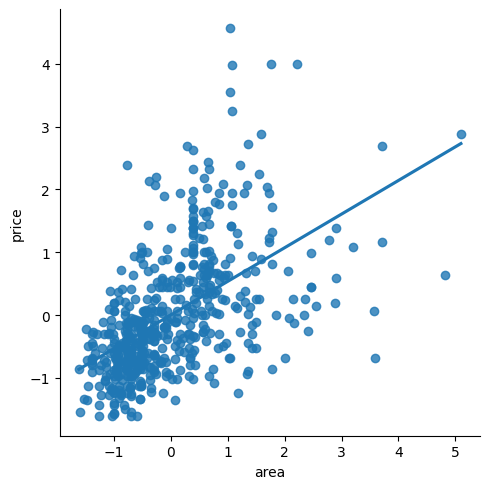

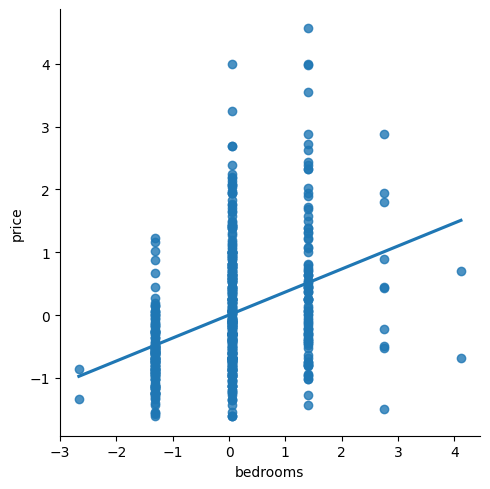

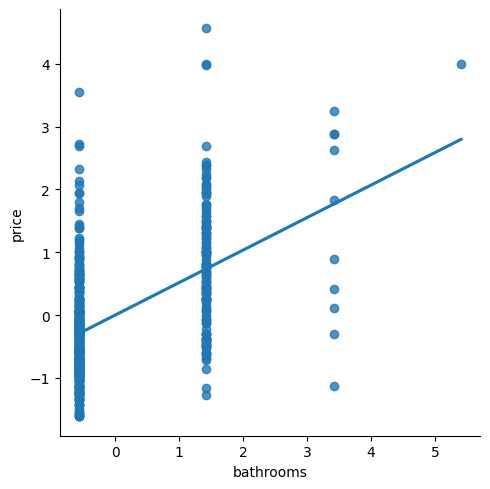

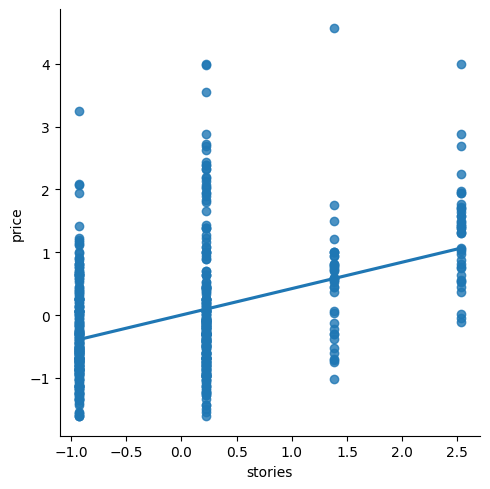

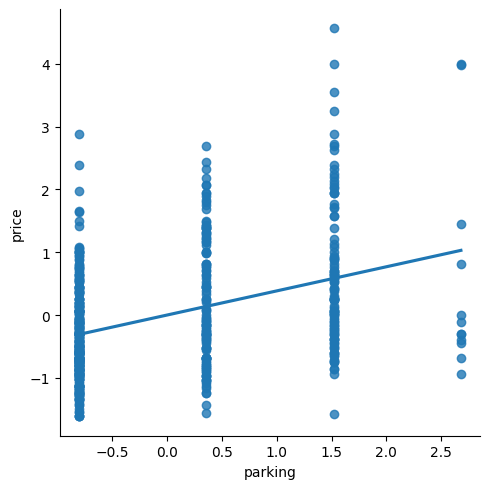

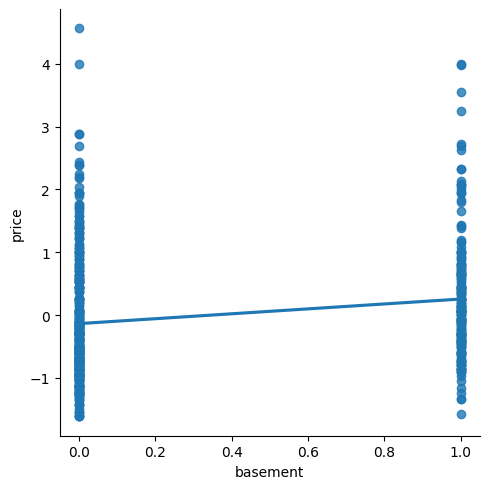

In [21]:
vector.graphBwFeatures()

the training method calls the fit method of Support Vector Regression and after fitting the training set it calculates and prints the cost function

In [22]:
vector.training()

Cost from training: 0.20112313018017844


this method calculates the loss and accuracy of validation set

In [23]:
vector.validation()

Validation Loss: 0.29258950519136473, Validation Accuracy: 42.49365128942131


this method calculates the loss and accuracy of testing set

In [24]:
vector.testing()

Testing Loss: 0.2540925637952267, Testing Accuracy: 57.912271945161486


this method stores the metrics in a json file 

In [25]:
vector.storeJson()

Everything stored successfully!


this method plots a graph between actual target values of data sets and the predicted values that are calculated after the model is fitted. the black dashed line represents a perfect prediction scenario where every predicted value exactly matches the actual value. this line helps us determine how accurate our fitted model is.

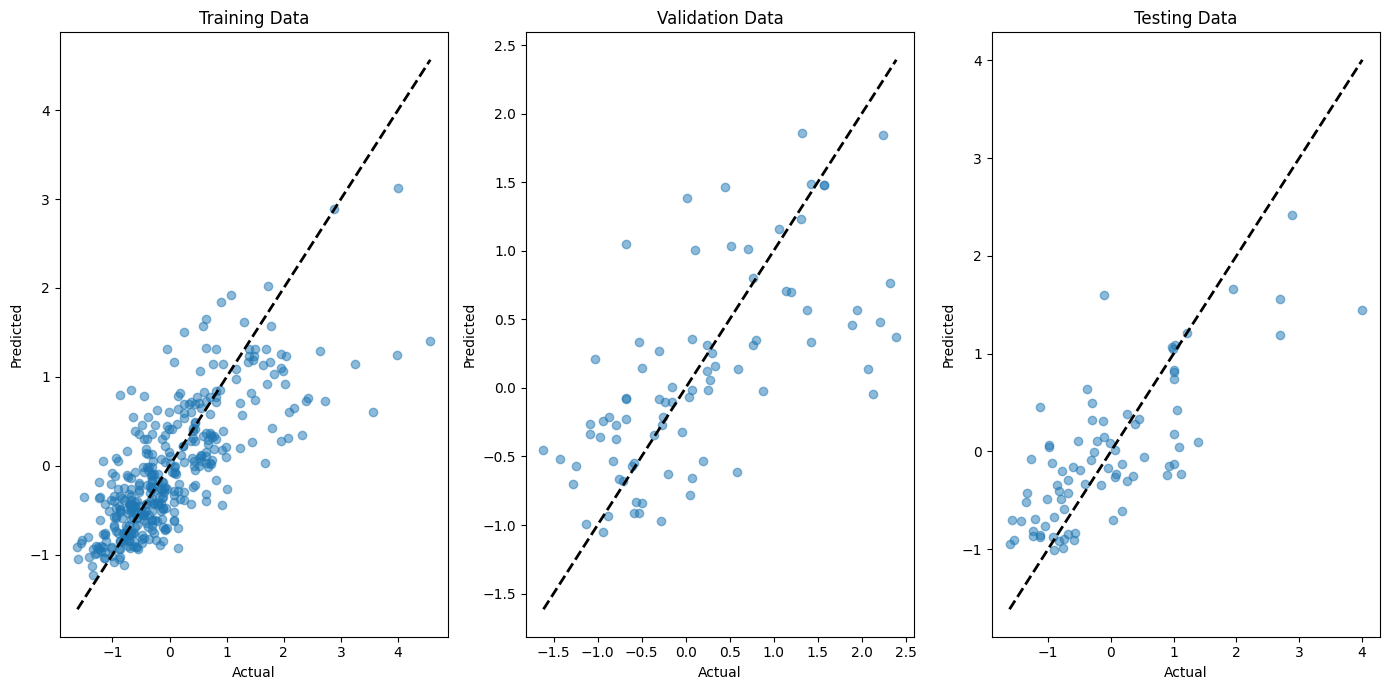

In [26]:
vector.plotResults()